<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [3]:
# Comprehensive dataset info
print("🔍 Dataset Summary:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    '% Missing': (df.isnull().sum() / len(df)) * 100
})
display(df_info)

🔍 Dataset Summary:


,Data Type,Non-Null Count,Null Count,% Missing
ResponseId,int64,65437,0,0.000000
MainBranch,object,65437,0,0.000000
Age,object,65437,0,0.000000
Employment,object,65437,0,0.000000
RemoteWork,object,54806,10631,16.246160
...,...,...,...,...
JobSatPoints_11,float64,29445,35992,55.002522
SurveyLength,object,56182,9255,14.143375
SurveyEase,object,56238,9199,14.057796
ConvertedCompYearly,float64,23435,42002,64.186928


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [4]:
# Enhanced numerical stats
print("📊 Numerical Statistics:")
num_cols = df.select_dtypes(include=['int64','float64']).columns
display(df[num_cols].describe().round(2).T.style.background_gradient(cmap='Blues'))

📊 Numerical Statistics:


,count,mean,std,min,25%,50%,75%,max
ResponseId,65437.000000,32719.000000,18890.180000,1.000000,16360.000000,32719.000000,49078.000000,65437.000000
CompTotal,33740.000000,29638411381149976434844996221255135810973346761641119443102059683642337023745002072541016011726778410233362892066394456411829798103125811458473984.000000,5444117135142297852662284923089891085287507383810550263112532649055881882177265287407295512315682219200529825363197301258665890740227694357794258944.000000,0.000000,60000.000000,110000.000000,250000.000000,1000000000000000162545277246339097227904071986031452381501504981983615182576228378136120296965701983510464738707067395631197433897752887331883780669440.000000
WorkExp,29658.000000,11.470000,9.170000,0.000000,4.000000,9.000000,16.000000,50.000000
JobSatPoints_1,29324.000000,18.580000,25.970000,0.000000,0.000000,10.000000,22.000000,100.000000
JobSatPoints_4,29393.000000,7.520000,18.420000,0.000000,0.000000,0.000000,5.000000,100.000000
JobSatPoints_5,29411.000000,10.060000,21.830000,0.000000,0.000000,0.000000,10.000000,100.000000
JobSatPoints_6,29450.000000,24.340000,27.090000,0.000000,0.000000,20.000000,30.000000,100.000000
JobSatPoints_7,29448.000000,22.970000,27.020000,0.000000,0.000000,15.000000,30.000000,100.000000
JobSatPoints_8,29456.000000,20.280000,26.110000,0.000000,0.000000,10.000000,25.000000,100.000000
JobSatPoints_9,29456.000000,16.170000,24.850000,0.000000,0.000000,5.000000,20.000000,100.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [5]:
# Check for inconsistent country names
print("🌍 Unique Country Values:")
print(df['Country'].unique()[:20])  # Show first 20 unique values

# Find entries with unusual formatting
print("\nPotential Inconsistencies:")
print(df[df['Country'].str.contains('[0-9]|test|example', case=False, na=False)]['Country'].unique())

🌍 Unique Country Values:
['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...']

Potential Inconsistencies:
[]


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [6]:
# Standardize country names
country_mapping = {
    'US': 'United States',
    'USA': 'United States',
    'UK': 'United Kingdom',
    'U.K.': 'United Kingdom'
}
df['Country'] = df['Country'].replace(country_mapping).str.title()

# Verify standardization
print("\nStandardized Countries:")
print(df['Country'].value_counts().head(10))


Standardized Countries:
Country
United States Of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom Of Great Britain And Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Name: count, dtype: int64


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [7]:
# One-hot encode Employment column
employment_dummies = pd.get_dummies(df['Employment'], prefix='Employment', drop_first=True)
df = pd.concat([df, employment_dummies], axis=1)

print("Encoded Employment Columns:")
print(employment_dummies.columns.tolist())

Encoded Employment Columns:
['Employment_Employed, full-time;Employed, part-time', 'Employment_Employed, full-time;Independent contractor, freelancer, or self-employed', 'Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time', 'Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired', 'Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work', 'Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time', 'Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time', 'Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Retired', 'Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Student, pa

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [8]:
# Missing values report
missing_report = df.isnull().sum().sort_values(ascending=False)
missing_report = missing_report[missing_report > 0]
print("🚨 Columns with Missing Values:")
print(missing_report)

🚨 Columns with Missing Values:
AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [14]:
# First convert age ranges to numerical values (midpoint)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['Age'] = df['Age'].map(age_mapping)

# Now handle numerical imputation
num_cols_to_impute = ['ConvertedCompYearly', 'Age']

for col in num_cols_to_impute:
    # Skip if column doesn't exist
    if col not in df.columns:
        print(f"⚠️ Column '{col}' not found")
        continue
        
    # Convert to numeric if needed
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculate median (skip if all values are NaN)
    if df[col].isna().all():
        print(f"⚠️ Cannot impute '{col}' - all values are NaN")
        continue
        
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"✅ Imputed {col} with median: {median_val:.2f}")

# Verification
print("\nMissing values after imputation:")
print(df[num_cols_to_impute].isnull().sum())

✅ Imputed ConvertedCompYearly with median: 65000.00
✅ Imputed Age with median: 29.50

Missing values after imputation:
ConvertedCompYearly    0
Age                    0
dtype: int64


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [10]:
# Impute categorical columns with mode
cat_cols_to_impute = ['RemoteWork', 'EdLevel']
for col in cat_cols_to_impute:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(f"Imputed {col} with mode: {mode_val}")

Imputed RemoteWork with mode: Hybrid (some remote, some in-person)
Imputed EdLevel with mode: Bachelor’s degree (B.A., B.S., B.Eng., etc.)


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [11]:
# Manual Min-Max Scaling
df['ConvertedCompYearly_MinMax'] = (
    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / 
    (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
)
print("Min-Max Scaling Results:")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].describe().round(2))

Min-Max Scaling Results:
       ConvertedCompYearly  ConvertedCompYearly_MinMax
count             65437.00                    65437.00
mean              72576.36                        0.00
std              112220.68                        0.01
min                   1.00                        0.00
25%               65000.00                        0.00
50%               65000.00                        0.00
75%               65000.00                        0.00
max            16256603.00                        1.00


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>



📊 Transformation Results:
Original Skewness: 87.71
Log Transformed Skewness: -4.28


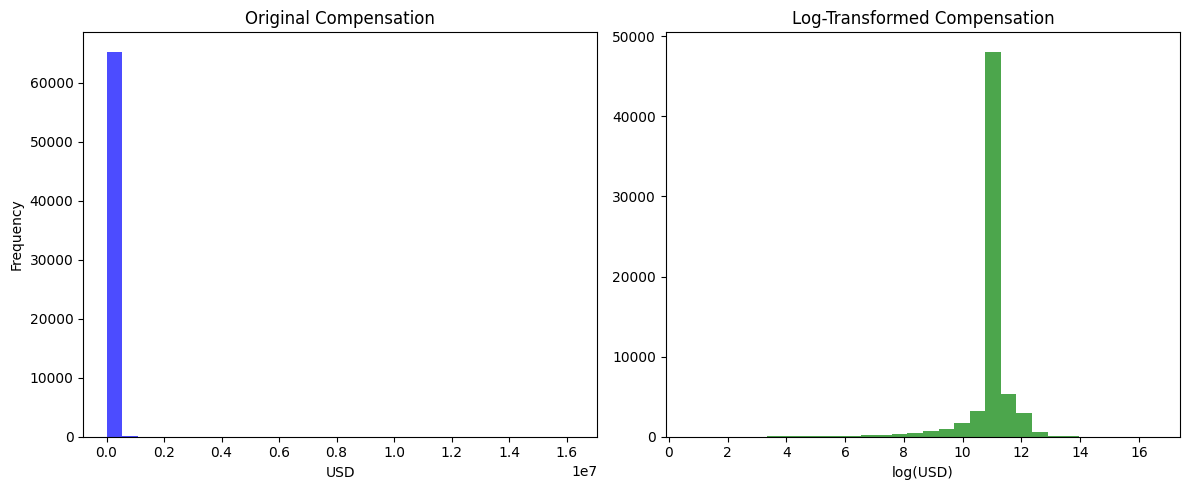

In [15]:
import numpy as np

# 1. First ensure the column is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# 2. Handle negative/zero values by adding constant (if any exist)
min_comp = df['ConvertedCompYearly'].min()
if min_comp <= 0:
    offset = abs(min_comp) + 1  # Add enough to make all values > 0
    print(f"⚠️ Found {sum(df['ConvertedCompYearly'] <= 0)} non-positive values - adding offset of {offset}")
    df['ConvertedCompYearly'] = df['ConvertedCompYearly'] + offset

# 3. Perform log transformation (using log1p for numerical stability)
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])

# 4. Verification
print("\n📊 Transformation Results:")
print(f"Original Skewness: {df['ConvertedCompYearly'].skew():.2f}")
print(f"Log Transformed Skewness: {df['ConvertedCompYearly_Log'].skew():.2f}")

# 5. Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['ConvertedCompYearly'], bins=30, color='blue', alpha=0.7)
plt.title('Original Compensation')
plt.xlabel('USD')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['ConvertedCompYearly_Log'], bins=30, color='green', alpha=0.7)
plt.title('Log-Transformed Compensation')
plt.xlabel('log(USD)')

plt.tight_layout()
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


🧑💼 Experience Level Distribution:


ExperienceLevel
Entry (0-2)         2639
Junior (3-5)       11476
Mid (6-10)         12928
Senior (11-20)     13327
Executive (20+)     8334
Unknown            16733
Name: count, dtype: int64

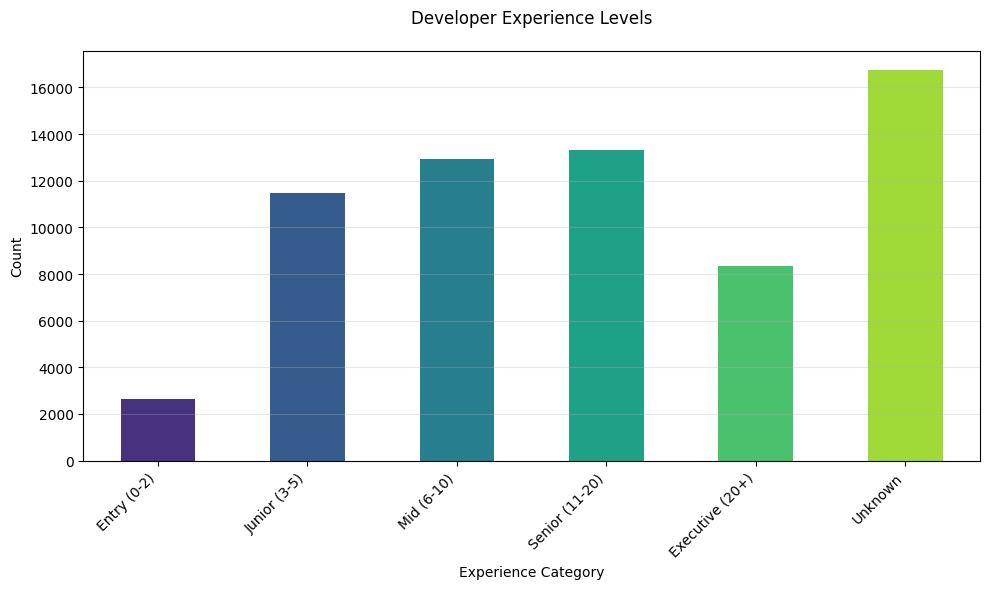


💰 Median Compensation by Experience Level:


/tmp/ipykernel_1018/3201086884.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('ExperienceLevel')['ConvertedCompYearly'].median().sort_values(ascending=False))


ExperienceLevel
Entry (0-2)        65000.0
Junior (3-5)       65000.0
Mid (6-10)         65000.0
Senior (11-20)     65000.0
Executive (20+)    65000.0
Unknown            65000.0
Name: ConvertedCompYearly, dtype: float64

In [18]:
import seaborn as sns
# 1. First ensure YearsCodePro is numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 2. Create bins and labels
experience_bins = [0, 2, 5, 10, 20, np.inf]
experience_labels = ['Entry (0-2)', 'Junior (3-5)', 'Mid (6-10)', 'Senior (11-20)', 'Executive (20+)']

# 3. Create new ExperienceLevel column
df['ExperienceLevel'] = pd.cut(
    df['YearsCodePro'],
    bins=experience_bins,
    labels=experience_labels,
    right=False
)

# 4. Handle missing values (if YearsCodePro had NAs)
df['ExperienceLevel'] = df['ExperienceLevel'].cat.add_categories('Unknown').fillna('Unknown')

# 5. Verify distribution
print("🧑💼 Experience Level Distribution:")
exp_dist = df['ExperienceLevel'].value_counts().sort_index()
display(exp_dist)

# 6. Visualization
plt.figure(figsize=(10, 6))
exp_dist.plot(kind='bar', color=sns.color_palette("viridis", len(exp_dist)))
plt.title('Developer Experience Levels', pad=20)
plt.xlabel('Experience Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Cross-check with compensation
if 'ConvertedCompYearly' in df.columns:
    print("\n💰 Median Compensation by Experience Level:")
    display(df.groupby('ExperienceLevel')['ConvertedCompYearly'].median().sort_values(ascending=False))

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
